In [61]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib as mpl
import matplotlib.pyplot as plt
import os

In [92]:
filepath = '/eos/user/s/siangyua/public/CSV_output/features/npz_files/'
files = []
for dirname, _, filenames in os.walk(filepath):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        files.append(filename)


/eos/user/s/siangyua/public/CSV_output/features/npz_files/noTauDFCand.npz
/eos/user/s/siangyua/public/CSV_output/features/npz_files/reco_MET.npz
/eos/user/s/siangyua/public/CSV_output/features/npz_files/reco_leading_lep.npz
/eos/user/s/siangyua/public/CSV_output/features/npz_files/reco_sublead_lep.npz
/eos/user/s/siangyua/public/CSV_output/features/npz_files/truth_Higgs.npz
/eos/user/s/siangyua/public/CSV_output/features/npz_files/truth_MET.npz
/eos/user/s/siangyua/public/CSV_output/features/npz_files/truth_leading_lep.npz
/eos/user/s/siangyua/public/CSV_output/features/npz_files/truth_leading_nu.npz
/eos/user/s/siangyua/public/CSV_output/features/npz_files/truth_leading_w.npz
/eos/user/s/siangyua/public/CSV_output/features/npz_files/truth_sublead_lep.npz
/eos/user/s/siangyua/public/CSV_output/features/npz_files/truth_sublead_nu.npz
/eos/user/s/siangyua/public/CSV_output/features/npz_files/truth_sublead_w.npz


In [93]:
for i,j in enumerate(files):
    print()
    f = np.load(filepath+j,allow_pickle=True)
    a = f.files
    print(f'{i}.\t'+j+'\n',[(x,f[x].shape) for x in a])


0.	noTauDFCand.npz
 [('noTau', (1640189,)), ('DF', (1640189,)), ('cand', (1640189,))]

1.	reco_MET.npz
 [('pt', (1640189,)), ('px', (1640189,)), ('py', (1640189,)), ('phi', (1640189,))]

2.	reco_leading_lep.npz
 [('E', (1640189,)), ('px', (1640189,)), ('py', (1640189,)), ('pz', (1640189,)), ('m', (1640189,)), ('pt', (1640189,)), ('eta', (1640189,)), ('phi', (1640189,))]

3.	reco_sublead_lep.npz
 [('E', (1640189,)), ('px', (1640189,)), ('py', (1640189,)), ('pz', (1640189,)), ('m', (1640189,)), ('pt', (1640189,)), ('eta', (1640189,)), ('phi', (1640189,))]

4.	truth_Higgs.npz
 [('E', (1640189,)), ('px', (1640189,)), ('py', (1640189,)), ('pz', (1640189,)), ('m2', (1640189,)), ('pt', (1640189,)), ('eta', (1640189,)), ('phi', (1640189,)), ('pdgId', (1640189,))]

5.	truth_MET.npz
 [('pt', (1640189,)), ('px', (1640189,)), ('py', (1640189,)), ('phi', (1640189,))]

6.	truth_leading_lep.npz
 [('E', (1640189,)), ('px', (1640189,)), ('py', (1640189,)), ('pz', (1640189,)), ('m2', (1640189,)), ('pt'

|index|filename             |Description|
|-----|:-------------------:|:----------:|
|0.	  |noTauDFCand.npz      |ncols = 3, type = {`bool`,`bool`,`string`}, contents = {no tau?, Different flavor?, EM or ME}|
|1.	  |reco_MET.npz         |ncols = 4, type = `double`, contents = {$p_T^\mathrm{miss}$, $p_x^\mathrm{miss}$, $p_y^\mathrm{miss}$, $\phi$} |
|2.	  |reco_leading_lep.npz |ncols = 8, type = `double`, contents = {$E$, $p_x$, $p_y$, $p_z$, $m$, $p_T$, $\eta$, $\phi$} | 
|3.	  |reco_sublead_lep.npz |*same as above, but for subleading reco lepton*|
|4.	  |truth_Higgs.npz      |ncols = 9, type = `double` + `int`, contents = {$E$, $p_x$, $p_y$, $p_z$, $m^2$, $p_T$, $\eta$, $\phi$, `pdgID`} |
|5.	  |truth_MET.npz        |*same as 1. but for truth MET* |
|6.	  |truth_leading_lep.npz|*truth particle contents*|
|7.	  |truth_leading_nu.npz |*truth particle contents*|
|8.	  |truth_leading_w.npz  |*truth particle contents*|
|9.	  |truth_sublead_lep.npz|*truth particle contents*|
|10.  |truth_sublead_nu.npz |*truth particle contents*|
|11.  |truth_sublead_w.npz  |*truth particle contents*|

## Take note that for the truth particle contents, the mass variable uses $m^2 = g_{\mu\nu}p^\mu p^\nu$, and the final column for `pdgId` only exists in truth and not in reco particle data

# Truth particle test: Lepton neutrino pair invariant mass versus W boson

In [82]:
%%time
truth_Higgs = pd.DataFrame()
truth_leading_lep = pd.DataFrame()
truth_sublead_lep = pd.DataFrame()
truth_leading_nu = pd.DataFrame()
truth_sublead_nu = pd.DataFrame()
truth_leading_w = pd.DataFrame()
truth_sublead_w = pd.DataFrame()
for i, x in enumerate(['E','px','py','pz','m2','eta','phi','pdgId']):
    GeV = 0.001 if i < 5 else 1
    if i == 4: GeV = (0.001*0.001)
    truth_Higgs[x]       = np.load(filepath+files[ 4],allow_pickle=True)[x]*GeV
    truth_leading_lep[x] = np.load(filepath+files[ 6],allow_pickle=True)[x]*GeV
    truth_leading_nu[x]  = np.load(filepath+files[ 7],allow_pickle=True)[x]*GeV
    truth_leading_w[x]   = np.load(filepath+files[ 8],allow_pickle=True)[x]*GeV 
    truth_sublead_lep[x] = np.load(filepath+files[ 9],allow_pickle=True)[x]*GeV
    truth_sublead_nu[x]  = np.load(filepath+files[10],allow_pickle=True)[x]*GeV
    truth_sublead_w[x]   = np.load(filepath+files[11],allow_pickle=True)[x]*GeV

CPU times: user 6.58 s, sys: 682 ms, total: 7.26 s
Wall time: 7.39 s


In [35]:
truth_leading_w.describe()

,E,px,py,pz,m2,eta,phi
count,1.640189e+06,1.640189e+06,1.640189e+06,1.640189e+06,1.640189e+06,1.640189e+06,1.640189e+06
mean,1.839857e+02,3.440237e-02,6.910512e-02,-5.142750e-02,5.334163e+03,-1.540633e-03,2.985917e-03
std,1.567362e+02,3.738281e+01,3.737319e+01,2.242512e+02,2.055338e+03,2.155222e+00,1.812557e+00
min,1.872600e+01,-7.925990e+02,-6.960300e+02,-3.221170e+03,4.004560e+00,-8.714400e+00,-3.141590e+00
25%,9.330690e+01,-1.838990e+01,-1.837060e+01,-9.283750e+01,5.281710e+03,-1.772160e+00,-1.565040e+00
50%,1.298230e+02,5.969780e-02,6.986360e-02,-1.633150e-02,6.334850e+03,-4.350840e-04,6.279900e-03
75%,2.151560e+02,1.849210e+01,1.851870e+01,9.263000e+01,6.517030e+03,1.769040e+00,1.570920e+00
max,3.241430e+03,7.937790e+02,8.429510e+02,3.239790e+03,1.241490e+04,9.582270e+00,3.141590e+00


In [51]:
truth_leading_lep_nu = ((truth_leading_lep['E' ]+truth_leading_nu['E' ])**2 -\
                        (truth_leading_lep['px']+truth_leading_nu['px'])**2 -\
                        (truth_leading_lep['py']+truth_leading_nu['py'])**2 -\
                        (truth_leading_lep['pz']+truth_leading_nu['pz'])**2)
truth_sublead_lep_nu = ((truth_sublead_lep['E' ]+truth_sublead_nu['E' ])**2 -\
                        (truth_sublead_lep['px']+truth_sublead_nu['px'])**2 -\
                        (truth_sublead_lep['py']+truth_sublead_nu['py'])**2 -\
                        (truth_sublead_lep['pz']+truth_sublead_nu['pz'])**2)

In [52]:
truthLeadingLepNu_TL = np.where(((truth_leading_lep['E' ]+truth_leading_nu['E' ])**2 -\
                                 (truth_leading_lep['px']+truth_leading_nu['px'])**2 -\
                                 (truth_leading_lep['py']+truth_leading_nu['py'])**2 -\
                                 (truth_leading_lep['pz']+truth_leading_nu['pz'])**2) > 0, True, False)
print(np.unique(truthLeadingLepNu_TL,return_counts=True))
truthSubleadLepNu_TL = np.where(((truth_sublead_lep['E' ]+truth_sublead_nu['E' ])**2 -\
                                 (truth_sublead_lep['px']+truth_sublead_nu['px'])**2 -\
                                 (truth_sublead_lep['py']+truth_sublead_nu['py'])**2 -\
                                 (truth_sublead_lep['pz']+truth_sublead_nu['pz'])**2) > 0, True, False)
print(np.unique(truthSubleadLepNu_TL,return_counts=True))
timelikes = truthLeadingLepNu_TL&truthSubleadLepNu_TL
print(np.unique(timelikes,return_counts=True))

(array([False,  True]), array([     35, 1640154]))
(array([False,  True]), array([      3, 1640186]))
(array([False,  True]), array([     38, 1640151]))


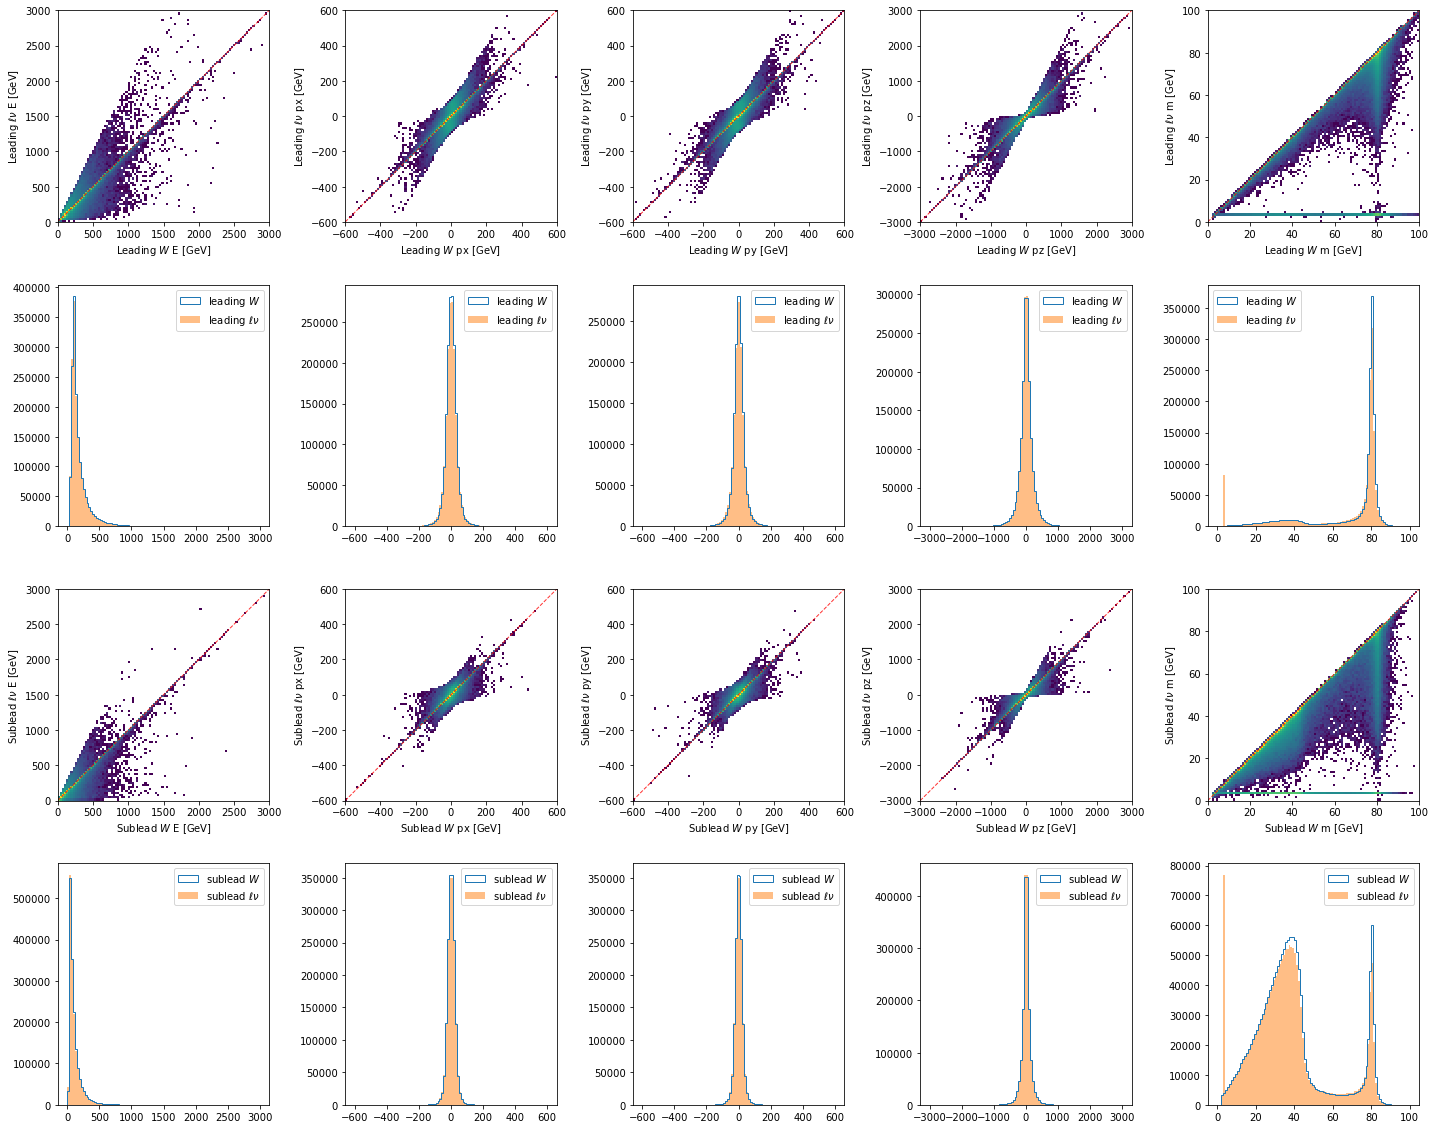

In [115]:
fig, ax = plt.subplots(nrows=4,ncols=5,figsize=(20,16),tight_layout=True)#,sharey='row')
xranges=[[0,3000],[-600,600],[-600,600],[-3000,3000],[0,100]]

for i,j in enumerate(['E','px','py','pz','m']):
    if i == 4:
        ax[0,i].hist2d(np.sqrt(truth_leading_w['m2'][timelikes]),np.sqrt(truth_leading_lep_nu[ timelikes]),range=[xranges[i],xranges[i]],bins=[nbins,nbins],cmap='viridis',norm=mpl.colors.LogNorm())
        ax[2,i].hist2d(np.sqrt(truth_sublead_w['m2'][timelikes]),np.sqrt(truth_sublead_lep_nu[ timelikes]),range=[xranges[i],xranges[i]],bins=[nbins,nbins],cmap='viridis',norm=mpl.colors.LogNorm())
        ax[1,i].hist(np.sqrt(truth_leading_w['m2'][timelikes]),range=xranges[i],bins=nbins,histtype='step',lw=1    ,label=r'leading $W$'      )
        ax[1,i].hist(np.sqrt(truth_leading_lep_nu[ timelikes]),range=xranges[i],bins=nbins,histtype='bar',alpha=0.5,label=r'leading $\ell\nu$')
        ax[3,i].hist(np.sqrt(truth_sublead_w['m2'][timelikes]),range=xranges[i],bins=nbins,histtype='step',lw=1    ,label=r'sublead $W$')
        ax[3,i].hist(np.sqrt(truth_sublead_lep_nu[ timelikes]),range=xranges[i],bins=nbins,histtype='bar',alpha=0.5,label=r'sublead $\ell\nu$')
    else:
        ax[0,i].hist2d(truth_leading_w[j],(truth_leading_lep[j]+truth_leading_nu[j]),range=[xranges[i],xranges[i]],bins=[nbins,nbins],cmap='viridis',norm=mpl.colors.LogNorm())
        ax[2,i].hist2d(truth_sublead_w[j],(truth_sublead_lep[j]+truth_sublead_nu[j]),range=[xranges[i],xranges[i]],bins=[nbins,nbins],cmap='viridis',norm=mpl.colors.LogNorm())
        ax[1,i].hist(truth_leading_w[j]                        ,range=xranges[i],bins=nbins,histtype='step',lw=1    ,label=r'leading $W$'      )
        ax[1,i].hist((truth_leading_lep[j]+truth_leading_nu[j]),range=xranges[i],bins=nbins,histtype='bar',alpha=0.5,label=r'leading $\ell\nu$')
        ax[3,i].hist(truth_sublead_w[j]                        ,range=xranges[i],bins=nbins,histtype='step',lw=1    ,label=r'sublead $W$')
        ax[3,i].hist((truth_sublead_lep[j]+truth_sublead_nu[j]),range=xranges[i],bins=nbins,histtype='bar',alpha=0.5,label=r'sublead $\ell\nu$')
    ax[0,i].axline((-1,-1),(1,1),lw=1,ls='dashed',c='r',alpha=0.8)
    ax[2,i].axline((-1,-1),(1,1),lw=1,ls='dashed',c='r',alpha=0.8)
    ax[0,i].set(xlabel=r'Leading $W$ '+j+' [GeV]',ylabel=r'Leading $\ell\nu$ '+j+' [GeV]',aspect=(1))
    ax[2,i].set(xlabel=r'Sublead $W$ '+j+' [GeV]',ylabel=r'Sublead $\ell\nu$ '+j+' [GeV]',aspect=(1))
    ax[1,i].legend()
    ax[3,i].legend()
plt.show()

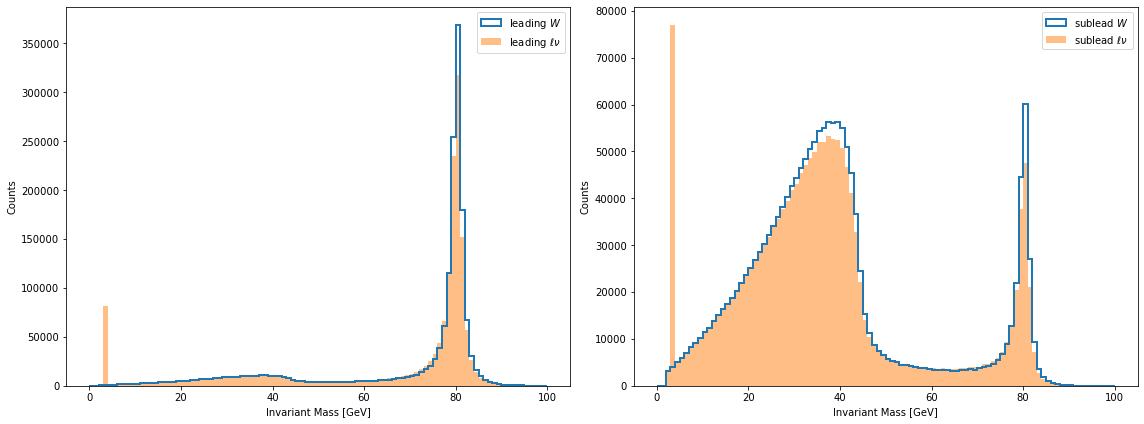

In [102]:
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(16,6),tight_layout=True)#,sharey='row')
ax = ax.flatten()
nbins=100
xrange=[0,100]
ax[0].hist(np.sqrt(truth_leading_w['m2'][timelikes]),range=xrange,bins=nbins,histtype='step',lw=2,label=r'leading $W$'      )
ax[0].hist(np.sqrt(truth_leading_lep_nu[ timelikes]),range=xrange,bins=nbins,histtype='bar',alpha=0.5,label=r'leading $\ell\nu$')
ax[1].hist(np.sqrt(truth_sublead_w['m2'][timelikes]),range=xrange,bins=nbins,histtype='step',lw=2,label=r'sublead $W$'      )
ax[1].hist(np.sqrt(truth_sublead_lep_nu[ timelikes]),range=xrange,bins=nbins,histtype='bar',alpha=0.5,label=r'sublead $\ell\nu$')
for i in ax:
    i.legend()
    i.set(xlabel='Invariant Mass [GeV]', ylabel='Counts')
plt.show()

# Truth particle test: W boson pair invariant mass versus Higgs

In [86]:
truth_ww = ((truth_leading_w['E' ]+truth_sublead_w['E' ])**2 -\
            (truth_leading_w['px']+truth_sublead_w['px'])**2 -\
            (truth_leading_w['py']+truth_sublead_w['py'])**2 -\
            (truth_leading_w['pz']+truth_sublead_w['pz'])**2)
truth_ww_TL = np.where(truth_ww > 0, True, False)
print(np.unique(truth_ww_TL,return_counts=True))

(array([ True]), array([1640189]))


In [96]:
my_cmap = mpl.colormaps.get_cmap("viridis")
my_cmap.set_under('w')

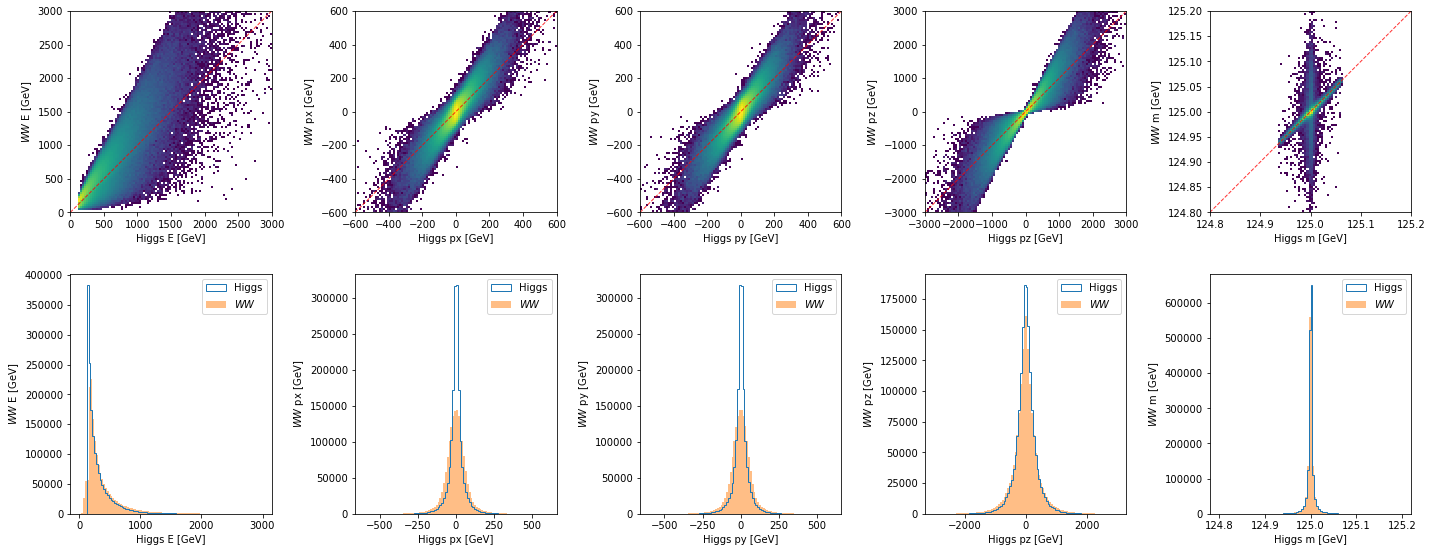

In [111]:
fig, ax = plt.subplots(nrows=2,ncols=5,figsize=(20,8),tight_layout=True)#,sharey='row')
#ax = ax.flatten()
xranges=[[0,3000],[-600,600],[-600,600],[-3000,3000],[124.8,125.2]]
for i,j in enumerate(['E','px','py','pz','m']):
    if i == 4:
        ax[0,i].hist2d(np.sqrt(truth_Higgs['m2']),np.sqrt(truth_WW),range=[xranges[i],xranges[i]],bins=[nbins,nbins],cmap=my_cmap,norm=mpl.colors.LogNorm())
        ax[1,i].hist(np.sqrt(truth_Higgs['m2']),range=xranges[i],bins=nbins,histtype='step',lw=1    ,label=r'Higgs')
        ax[1,i].hist(np.sqrt(truth_ww)         ,range=xranges[i],bins=nbins,histtype='bar',alpha=0.5,label=r'$WW$' )
    else:
        ax[0,i].hist2d(truth_Higgs[j],(truth_leading_w[j]+truth_leading_w[j]),range=[xranges[i],xranges[i]],bins=[nbins,nbins],cmap=my_cmap,norm=mpl.colors.LogNorm())
        ax[1,i].hist( truth_Higgs[j]                        ,range=xranges[i],bins=nbins,histtype='step',lw=1    ,label=r'Higgs')
        ax[1,i].hist((truth_leading_w[j]+truth_leading_w[j]),range=xranges[i],bins=nbins,histtype='bar',alpha=0.5,label=r'$WW$' )
    ax[1,i].legend()
    ax[0,i].axline((-1,-1),(1,1),lw=1,ls='dashed',c='r',alpha=0.8)
    ax[0,i].set(xlabel=r'Higgs '+j+' [GeV]',ylabel=r'$WW$ '+j+' [GeV]',aspect=(1))
    ax[1,i].set(xlabel=r'Higgs '+j+' [GeV]',ylabel=r'$WW$ '+j+' [GeV]',aspect='auto')

plt.show()

In [ ]:
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(16,3),tight_layout=True)#,sharey='row')


# Reco particle test: Event filter

In [118]:
noTauDF_cand = np.load(filepath+files[0],allow_pickle=True)
noTauDFCand = pd.DataFrame()
for i in noTauDF_cand.files:
    noTauDFCand[i] = noTauDF_cand[i]
noTauDFCand.head(5)

,noTau,DF,cand
0,0.0,1.0,NoReco
1,0.0,1.0,NoReco
2,0.0,1.0,NoReco
3,1.0,1.0,EventME
4,1.0,1.0,EventME


## Extract events that satisfy `noTau`,`DF`, and must have both truth and reco data

In [143]:
cand = np.where(noTauDFCand['cand']=='NoReco',0,1)
DifF = np.where(noTauDFCand['noTau']*noTauDFCand['DF']*cand == 1, 1, 0)
evtFilter = np.where(cand*DifF == 1, True, False)
print(np.unique(noTauDFCand['noTau'],return_counts=True))
print(np.unique(noTauDFCand['DF'],return_counts=True))
print(np.unique(noTauDFCand['cand'],return_counts=True))
print(np.unique(evtFilter,return_counts=True))

(array([0., 1.]), array([682933, 957256]))
(array([0., 1.]), array([ 312820, 1327369]))
(array(['EventEM', 'EventME', 'NoReco'], dtype=object), array([ 219147,  206235, 1214807]))
(array([False,  True]), array([1268458,  371731]))


In [140]:
%%time
reco_leading_lep = pd.DataFrame()
reco_sublead_lep = pd.DataFrame()
for i, x in enumerate(['E','px','py','pz','m','eta','phi']):
    GeV = 0.001 if i < 5 else 1
    reco_leading_lep[x] = np.load(filepath+files[2],allow_pickle=True)[x]*GeV
    reco_sublead_lep[x] = np.load(filepath+files[3],allow_pickle=True)[x]*GeV

CPU times: user 947 ms, sys: 64.6 ms, total: 1.01 s
Wall time: 1.09 s


In [144]:
truth_leading_lep_cut = truth_leading_lep.iloc[evtFilter,::].reset_index()
reco_leading_lep_cut  =  reco_leading_lep.iloc[evtFilter,::].reset_index()
truth_sublead_lep_cut = truth_sublead_lep.iloc[evtFilter,::].reset_index()
reco_sublead_lep_cut  =  reco_sublead_lep.iloc[evtFilter,::].reset_index()

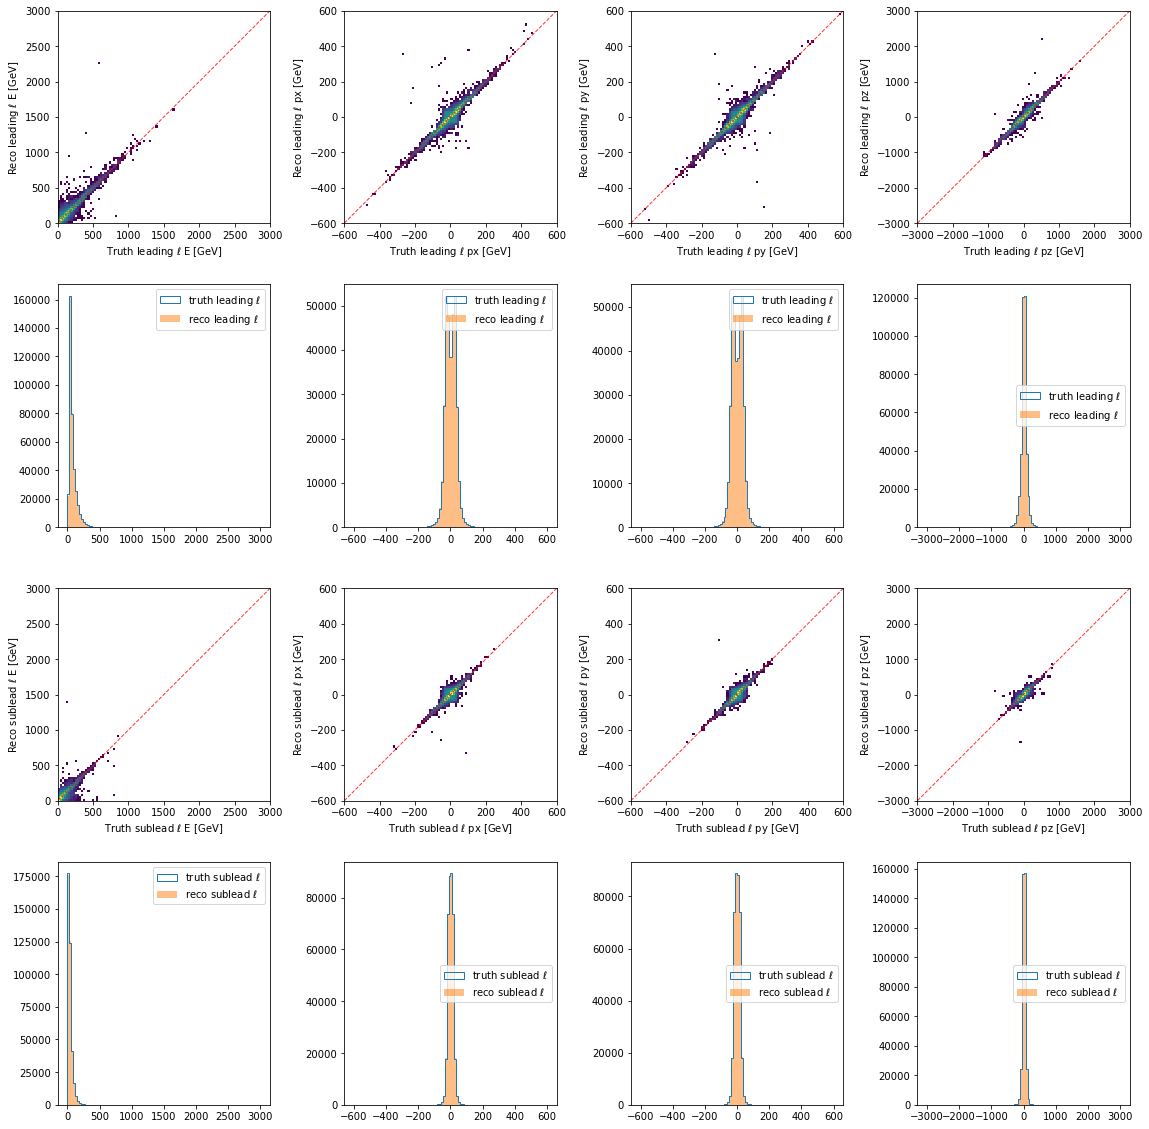

In [145]:
fig, ax = plt.subplots(nrows=4,ncols=4,figsize=(16,16),tight_layout=True)
xranges=[[0,3000],[-600,600],[-600,600],[-3000,3000],[124.8,125.2]]
for i,j in enumerate(['E','px','py','pz']):
    ax[0,i].hist2d(truth_leading_lep_cut[j],reco_leading_lep_cut[j],range=[xranges[i],xranges[i]],bins=[nbins,nbins],cmap='viridis',norm=mpl.colors.LogNorm())
    ax[2,i].hist2d(truth_sublead_lep_cut[j],reco_sublead_lep_cut[j],range=[xranges[i],xranges[i]],bins=[nbins,nbins],cmap='viridis',norm=mpl.colors.LogNorm())
    ax[1,i].hist(truth_leading_lep_cut[j],range=xranges[i],bins=nbins,histtype='step',lw=1    ,label=r'truth leading $\ell$'      )
    ax[1,i].hist( reco_leading_lep_cut[j],range=xranges[i],bins=nbins,histtype='bar',alpha=0.5,label=r'reco leading $\ell$')
    ax[3,i].hist(truth_sublead_lep_cut[j],range=xranges[i],bins=nbins,histtype='step',lw=1    ,label=r'truth sublead $\ell$')
    ax[3,i].hist( reco_sublead_lep_cut[j],range=xranges[i],bins=nbins,histtype='bar',alpha=0.5,label=r'reco sublead $\ell$')
    ax[0,i].axline((-1,-1),(1,1),lw=1,ls='dashed',c='r',alpha=0.8)
    ax[2,i].axline((-1,-1),(1,1),lw=1,ls='dashed',c='r',alpha=0.8)
    ax[0,i].set(xlabel=r'Truth leading $\ell$ '+j+' [GeV]',ylabel=r'Reco leading $\ell$ '+j+' [GeV]',aspect=(1))
    ax[2,i].set(xlabel=r'Truth sublead $\ell$ '+j+' [GeV]',ylabel=r'Reco sublead $\ell$ '+j+' [GeV]',aspect=(1))
    ax[1,i].legend()
    ax[3,i].legend()
plt.show()